In [2]:
from google.colab import drive
import os, shutil

drive.mount('/content/drive')

base_drive_path = "/content/drive/MyDrive/ds_kashvi_thakkar/csv_files"

required_dirs = ["csv_files", "outputs", "notebooks"]
for d in required_dirs:
    if not os.path.exists(d):
        os.makedirs(d)
        print(f"Created folder: {d}")

files_needed = ["historical_data.csv", "fear_greed_index.csv"]

print("\nCopying files...\n")

for f in files_needed:
    src = f"{base_drive_path}/{f}"
    dst = f"csv_files/{f}"
    if os.path.exists(src):
        shutil.copy(src, dst)
        print(f"Copied {f}")
    else:
        print(f"Missing in Drive: {f}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Copying files...

Copied historical_data.csv
Copied fear_greed_index.csv


In [3]:
import pandas as pd

df_hist = pd.read_csv("csv_files/historical_data.csv")
df_fgi = pd.read_csv("csv_files/fear_greed_index.csv")

print("Historical Data Sample:")
display(df_hist.head())

print("Fear & Greed Data Sample:")
display(df_fgi.head())


Historical Data Sample:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


Fear & Greed Data Sample:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [4]:
# Clean historical data
df_hist = df_hist.rename(columns={
    'Timestamp': 'timestamp',
    'Execution Price': 'execution_price',
    'Size Tokens': 'size_tokens',
    'Size USD': 'size_usd',
    'Closed PnL': 'closed_pnl',
    'Transaction Hash': 'transaction_hash',
    'Order ID': 'order_id',
    'Trade ID': 'trade_id',
    'Timestamp IST': 'timestamp_ist'
})

# Convert timestamp to datetime
df_hist['datetime'] = pd.to_datetime(df_hist['timestamp'], unit='ms', errors='coerce')

# Clean fear & greed index
df_fgi['date'] = pd.to_datetime(df_fgi['date'], errors='coerce')
df_fgi['timestamp'] = pd.to_datetime(df_fgi['timestamp'], unit='s', errors='coerce')

print(df_hist.columns)
print(df_fgi.columns)


Index(['Account', 'Coin', 'execution_price', 'size_tokens', 'size_usd', 'Side',
       'timestamp_ist', 'Start Position', 'Direction', 'closed_pnl',
       'transaction_hash', 'order_id', 'Crossed', 'Fee', 'trade_id',
       'timestamp', 'datetime'],
      dtype='object')
Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


In [5]:
df_hist["date"] = df_hist["datetime"].dt.date
df_fgi["date"] = df_fgi["date"].dt.date

merged = pd.merge(df_hist, df_fgi[['date', 'classification', 'value']],
                  on="date", how="left")

print("Merged Dataset Preview:")
display(merged.head())


Merged Dataset Preview:


,Account,Coin,execution_price,size_tokens,size_usd,Side,timestamp_ist,Start Position,Direction,closed_pnl,transaction_hash,order_id,Crossed,Fee,trade_id,timestamp,datetime,date,classification,value
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27,Greed,74.0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27,Greed,74.0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27,Greed,74.0
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-10-27 03:33:20,2024-10-27,Greed,74.0
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-10-27 03:33:20,2024-10-27,Greed,74.0


In [6]:
pnl_sentiment = merged.groupby("classification")["closed_pnl"].mean().reset_index()

print("Average Trader PnL by Sentiment:")
display(pnl_sentiment)


Average Trader PnL by Sentiment:


,classification,closed_pnl
0,Extreme Greed,25.418772
1,Fear,50.047622
2,Greed,87.894859
3,Neutral,22.229713


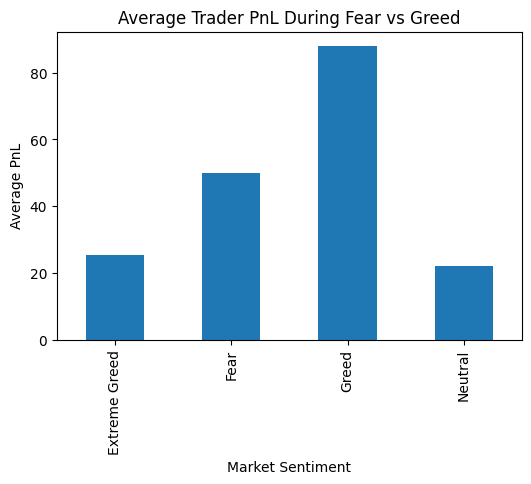

In [7]:
import matplotlib.pyplot as plt

sentiment_pnl = merged.groupby("classification")["closed_pnl"].mean()

plt.figure(figsize=(6,4))
sentiment_pnl.plot(kind='bar')
plt.xlabel("Market Sentiment")
plt.ylabel("Average PnL")
plt.title("Average Trader PnL During Fear vs Greed")
plt.savefig("outputs/pnl_vs_sentiment.png")
plt.show()


In [8]:
volume_sentiment = merged.groupby("classification")["size_usd"].sum().reset_index()

print("Trading Volume by Sentiment:")
display(volume_sentiment)


Trading Volume by Sentiment:


,classification,size_usd
0,Extreme Greed,3.940677e+07
1,Fear,7.041585e+08
2,Greed,1.155037e+08
3,Neutral,2.184323e+07


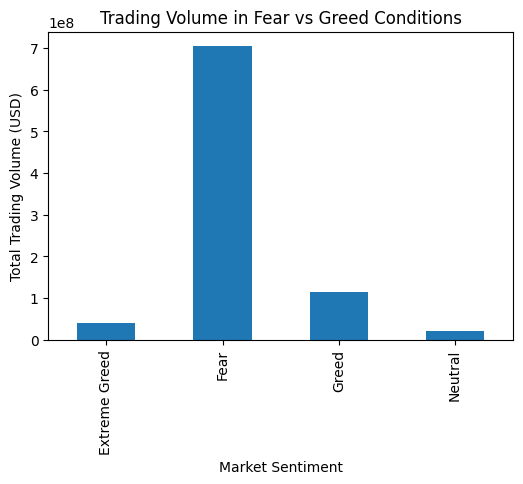

In [9]:
volume_sentiment = merged.groupby("classification")["size_usd"].sum()

plt.figure(figsize=(6,4))
volume_sentiment.plot(kind='bar')
plt.xlabel("Market Sentiment")
plt.ylabel("Total Trading Volume (USD)")
plt.title("Trading Volume in Fear vs Greed Conditions")
plt.savefig("outputs/volume_vs_sentiment.png")
plt.show()


In [10]:
side_sentiment = merged.groupby(["classification", "Side"]).size().reset_index(name="count")

print("Side Distribution:")
display(side_sentiment)


Side Distribution:


,classification,Side,count
0,Extreme Greed,BUY,3371
1,Extreme Greed,SELL,3591
2,Fear,BUY,66081
3,Fear,SELL,67790
4,Greed,BUY,15421
5,Greed,SELL,20868
6,Neutral,BUY,3505
7,Neutral,SELL,3636


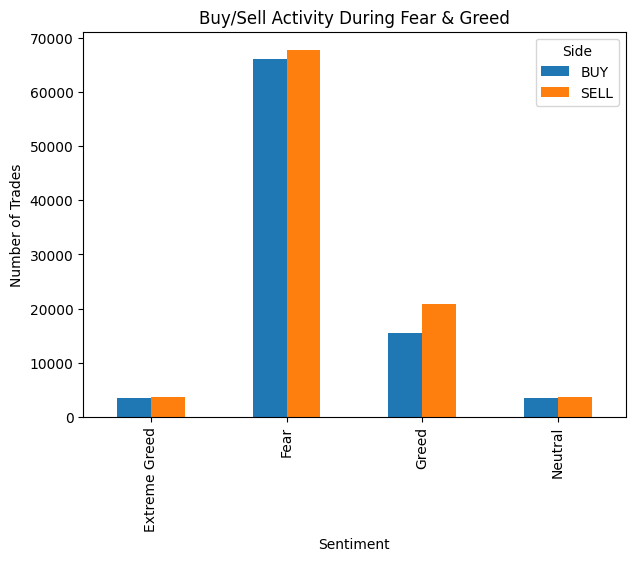

In [11]:
side_dist = merged.groupby(["classification", "Side"]).size().unstack()

side_dist.plot(kind='bar', figsize=(7,5))
plt.xlabel("Sentiment")
plt.ylabel("Number of Trades")
plt.title("Buy/Sell Activity During Fear & Greed")
plt.savefig("outputs/buy_sell_vs_sentiment.png")
plt.show()


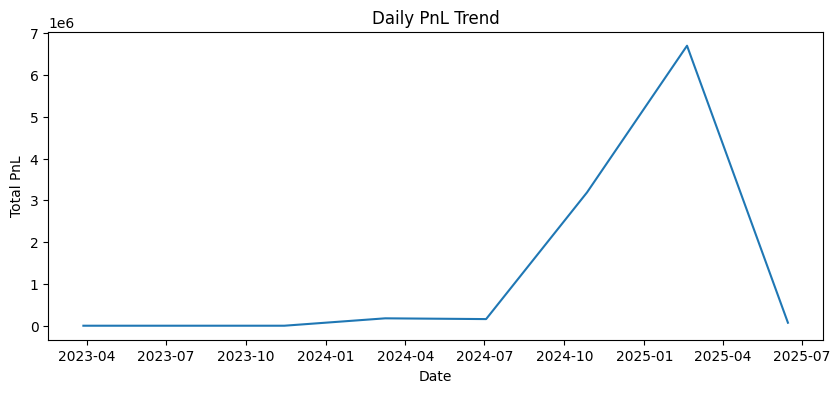

In [12]:
daily_pnl = merged.groupby("date")["closed_pnl"].sum()

plt.figure(figsize=(10,4))
daily_pnl.plot()
plt.xlabel("Date")
plt.ylabel("Total PnL")
plt.title("Daily PnL Trend")
plt.savefig("outputs/daily_pnl_trend.png")
plt.show()
